In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
np.random.seed(123)
from scipy import linalg

In [2]:
x = np.linspace(0,1,10)
print(x)

[ 0.          0.11111111  0.22222222  0.33333333  0.44444444  0.55555556
  0.66666667  0.77777778  0.88888889  1.        ]


In [3]:
np.random.randn(len(x))

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ])

In [4]:
mu = 0.0
sigma = 0.5
noise =  sigma**2 * np.random.randn(len(x)) + mu
noise

array([-0.16972154, -0.02367724,  0.37284741, -0.1597255 , -0.11099549,
       -0.10858782,  0.55148252,  0.54669652,  0.25101347,  0.0965466 ])

In [5]:
m = 2.3
c = 1.5
y = m * x + c + noise

In [6]:
np.column_stack((x,y))

array([[ 0.        ,  1.33027846],
       [ 0.11111111,  1.73187831],
       [ 0.22222222,  2.38395852],
       [ 0.33333333,  2.10694117],
       [ 0.44444444,  2.41122673],
       [ 0.55555556,  2.66918996],
       [ 0.66666667,  3.58481585],
       [ 0.77777778,  3.83558541],
       [ 0.88888889,  3.79545792],
       [ 1.        ,  3.8965466 ]])

In [7]:
X = x.reshape(-1,1)
print(X)

[[ 0.        ]
 [ 0.11111111]
 [ 0.22222222]
 [ 0.33333333]
 [ 0.44444444]
 [ 0.55555556]
 [ 0.66666667]
 [ 0.77777778]
 [ 0.88888889]
 [ 1.        ]]


In [8]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
Xline = np.array([np.min(x), np.max(x)]).reshape(-1,1)
yline = model.predict(Xline)
print(Xline)
print(yline)

[[ 0.]
 [ 1.]]
[ 1.42482811  4.12434768]


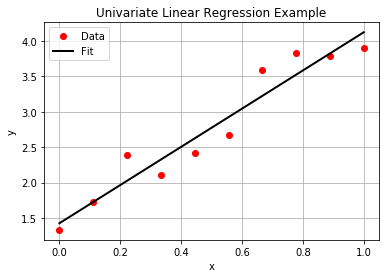

In [10]:
plt.plot(X, y, 'ro')
plt.plot(Xline, yline, color='k', linestyle='-', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Data', 'Fit'])
plt.title('Univariate Linear Regression Example')
plt.grid(True)
plt.show()

In [11]:
print(model.intercept_)
print(model.coef_)

1.42482810541
[ 2.69951958]


In [12]:
model.score(X, y) # R^2 value from scikit-learn

0.9280373562611971

In [13]:
# Compare with analytical solution
X = np.ones((len(x),2))
X[:,1] = x
theta = linalg.inv(X.T @ X) @ X.T @ y
print(theta)

[ 1.42482811  2.69951958]


In [14]:
ypred = X @ theta

In [15]:
np.column_stack((y, ypred))

array([[ 1.33027846,  1.42482811],
       [ 1.73187831,  1.72477473],
       [ 2.38395852,  2.02472134],
       [ 2.10694117,  2.32466796],
       [ 2.41122673,  2.62461458],
       [ 2.66918996,  2.9245612 ],
       [ 3.58481585,  3.22450782],
       [ 3.83558541,  3.52445444],
       [ 3.79545792,  3.82440106],
       [ 3.8965466 ,  4.12434768]])

In [16]:
ybar = np.mean(y)
SStot = np.sum((y - ybar)**2) # Total Sum of Squares
SSres = np.sum((y - ypred)**2) # Residual Sum of Squares
Rsq = 1.0 - SSres / SStot
print(Rsq)

0.928037356261
